# Let's import the Libraries to be used:

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import  plotly



import  plotly.graph_objs as go
import  plotly.io as pio
from plotly.subplots import make_subplots
import  plotly.express as px
from plotly.offline import iplot, init_notebook_mode
import  cufflinks as cf
import  plotly.figure_factory as ff
from plotly.offline import iplot
from plotly import tools
from ipywidgets import widgets

In [2]:
from pyampute.exploration.md_patterns import mdPatterns
from pyampute.exploration.mcar_statistical_tests import MCARTest
import missingno as msno

In [3]:
import warnings

warnings.filterwarnings("ignore", message=".*cannot be placed.*")


In [4]:
plt.style.use('seaborn-darkgrid')


# set some display options:
plt.rcParams['figure.dpi'] = 100
colors = px.colors.qualitative.Prism
pio.templates.default = "plotly_white"
plotly.offline.init_notebook_mode(connected = True)

C:\Users\merte\AppData\Local\Temp\ipykernel_15876\836852743.py:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



## Let's import the data

In [39]:
target_variable_names=["yield_strength",
"ultimate_tensile_strength",]
target = target_variable_names[0]

In [40]:
X_train=pd.read_csv('data/train.csv',)
y_train=X_train[target_variable_names]
X_train.drop(columns=["Unnamed: 0"], inplace=True)


X_valid=pd.read_csv('data/validation.csv')
y_valid=X_valid[target_variable_names]
X_valid.drop(columns=["Unnamed: 0"],inplace=True)


X_test=pd.read_csv('data/test.csv')
y_test=X_test[target_variable_names]
X_test.drop(columns=["Unnamed: 0"],inplace=True)


In [41]:
def get_categorical_variables(df):
    return df.select_dtypes(include='object').columns

def get_numerical_variables(df):
    return df.select_dtypes(exclude='object').columns

In [42]:
categorical_features=get_categorical_variables(X_train).tolist()
numeric_features=get_numerical_variables(X_train).tolist()

# Analyse the loss of information due to NaN targets

In [43]:
def diagnostic_plots(df, variable, target, lib='matplotlib'):
    if lib == 'matplotlib' or lib == 'pyplot':
        # Verifica se a variável tem valores não nulos
        if not df[variable].isna().all():

            # Define o tamanho da figura
            plt.figure(figsize=(16, 4))

            # Subconjunto onde o target é NaN
            nan_target = df[df[target].isna()][variable].dropna()
            not_nan_target = df[~df[target].isna()][variable].dropna()

            # Histogramas separados por target NaN e não NaN
            plt.subplot(1, 3, 1)
            sns.histplot(nan_target, kde=True, color='red', stat="density", label='Target NaN')
            sns.histplot(not_nan_target, kde=True, color='green', stat="density", label='Target not NaN')
            plt.legend()
            plt.title(f'Histogram of {variable}')

            # Q-Q plot
            ax = plt.subplot(1, 3, 2)
            stats.probplot(df[variable].dropna(), dist="norm", plot=plt)
            ax.get_lines()[0].set_markersize(7.0)
            ax.get_lines()[0].set_markerfacecolor('#44B1A5')
            ax.get_lines()[0].set_color('#44B1A5')

            ax.get_lines()[1].set_markerfacecolor('#FF7627')
            plt.ylabel('RM quantiles')

            # Boxplot com separação por target NaN e não NaN
            plt.subplot(1, 3, 3)
            # Convertendo os valores booleanos para strings para evitar o erro
            sns.boxplot(x=df[target].isna().astype(str), y=df[variable], palette={"True": "red", "False": "green"})
            plt.title(f'Boxplot of {variable}')

            plt.suptitle(f'Distribution of {variable}', fontsize=16)
            plt.show()

        else:
            print(f'The variable {variable} is all NaNs!')
    else:
        print('Choose lib equals to "matplotlib" or "plotly"!')


C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




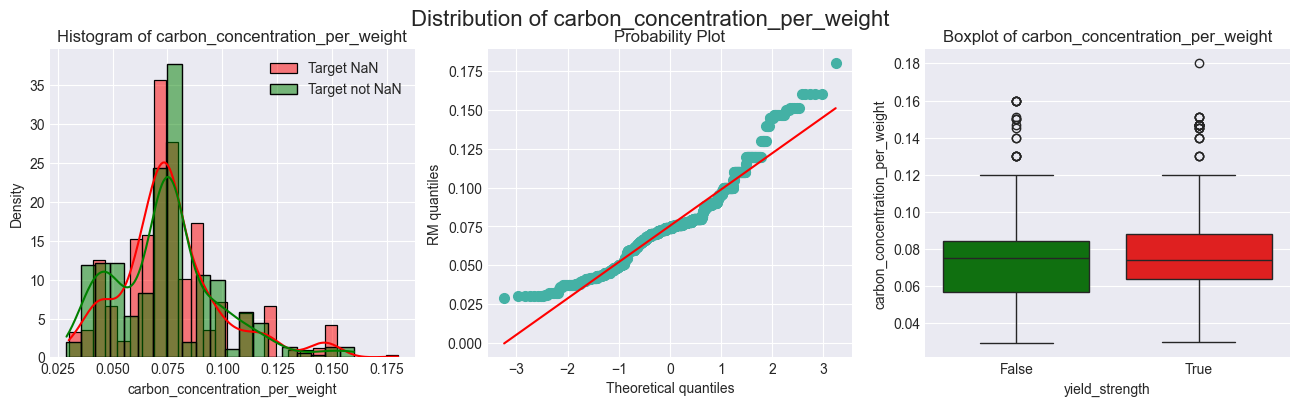

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




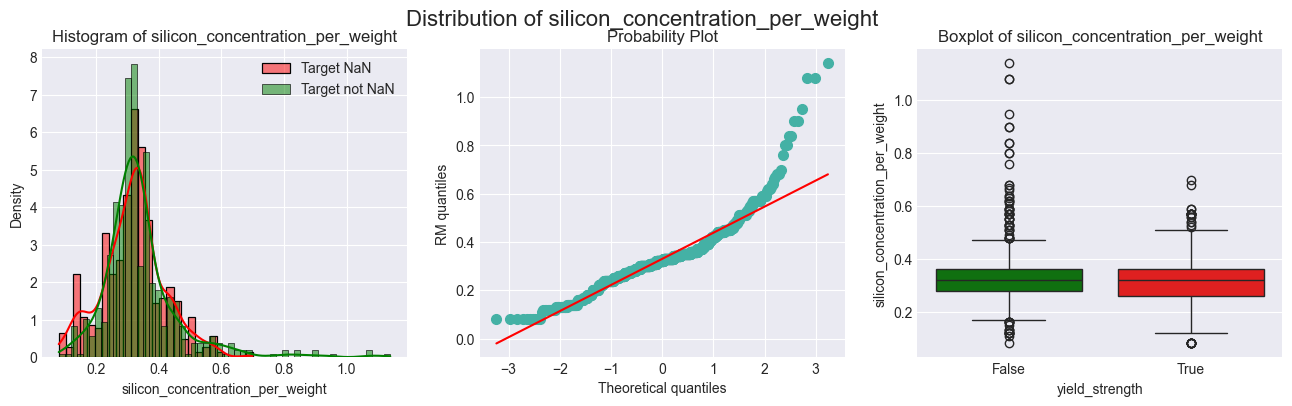

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




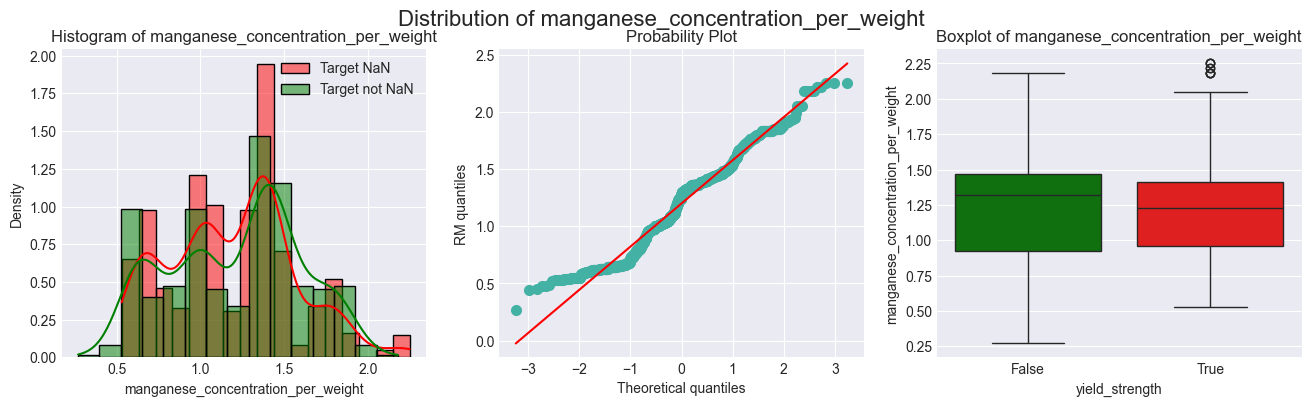

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




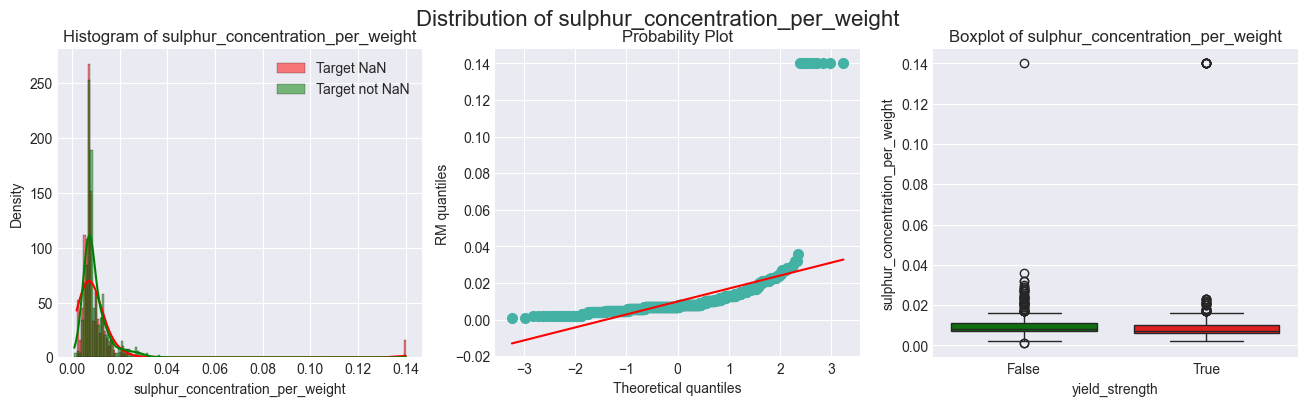

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




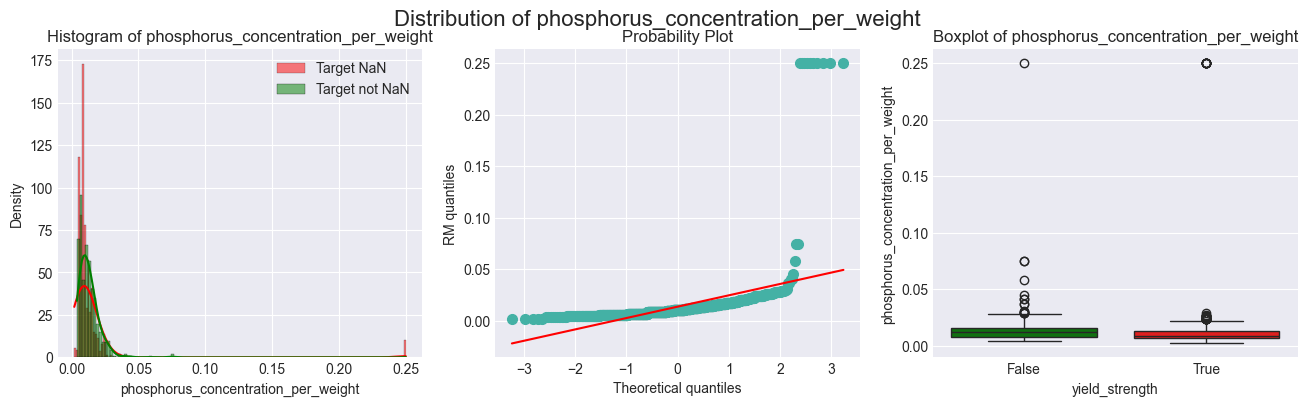

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




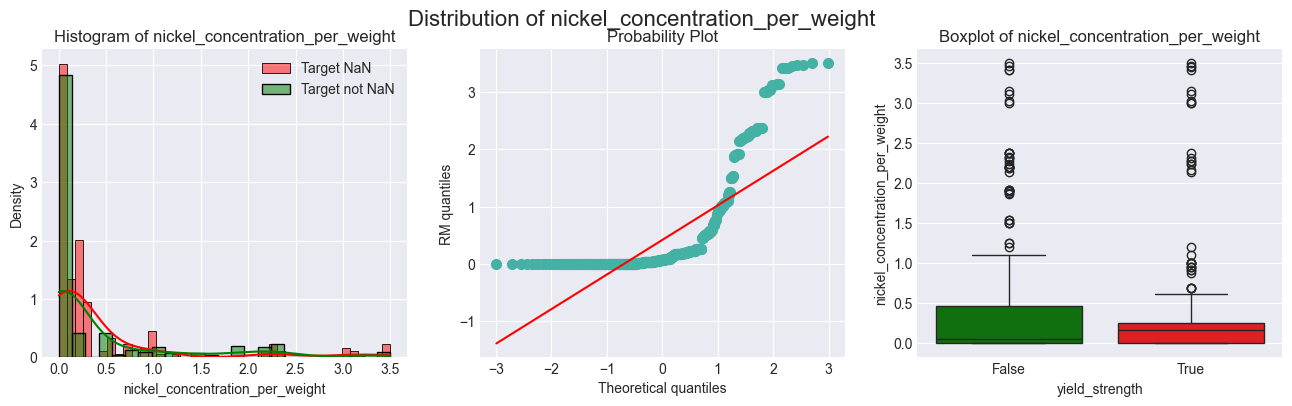

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




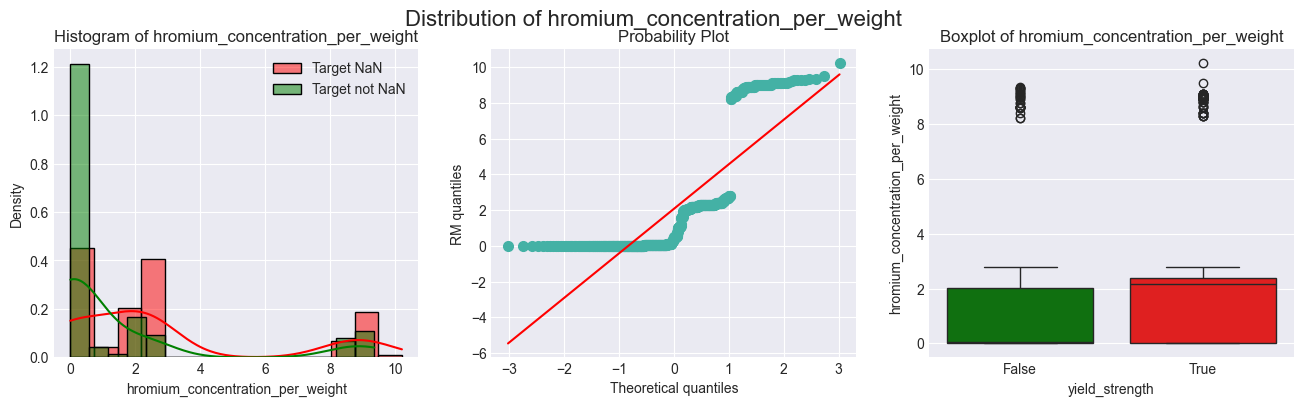

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




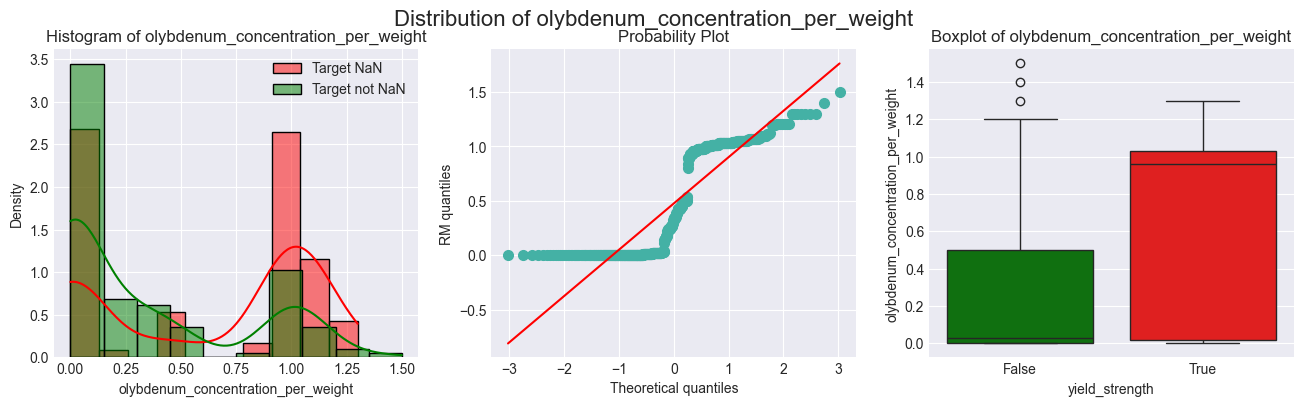

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




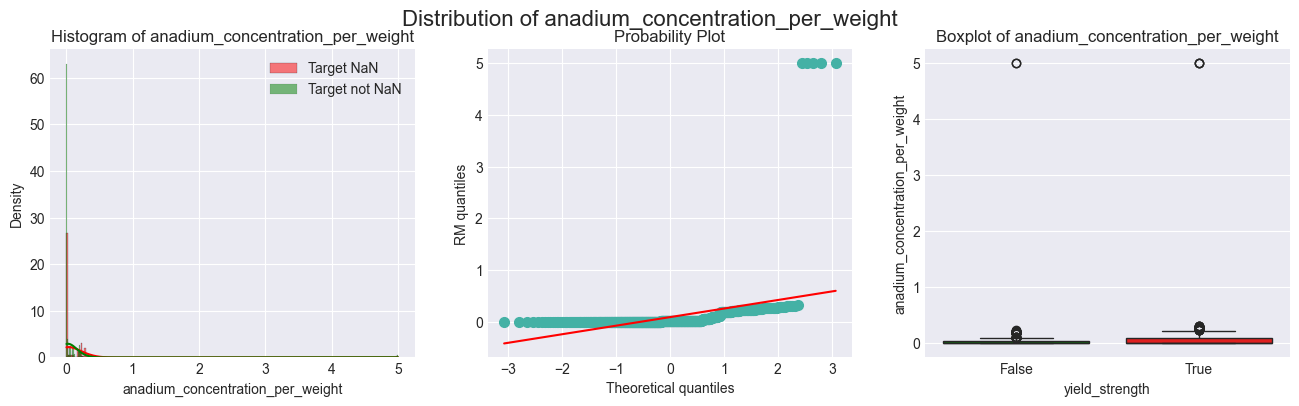

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




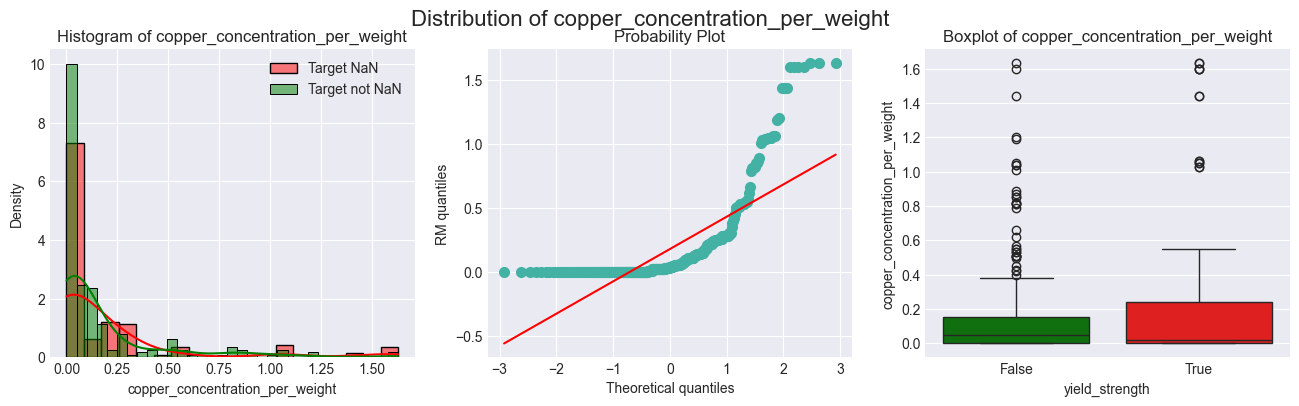

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




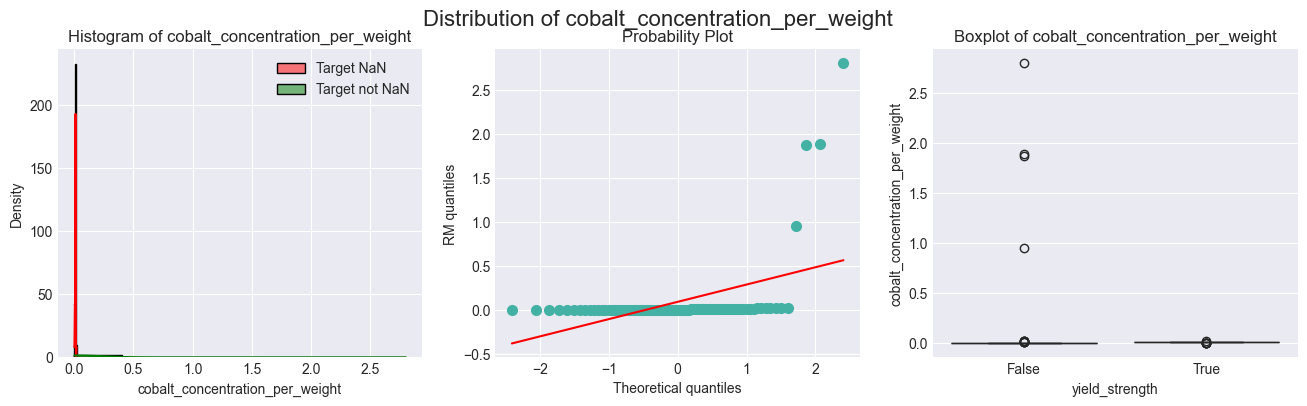

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




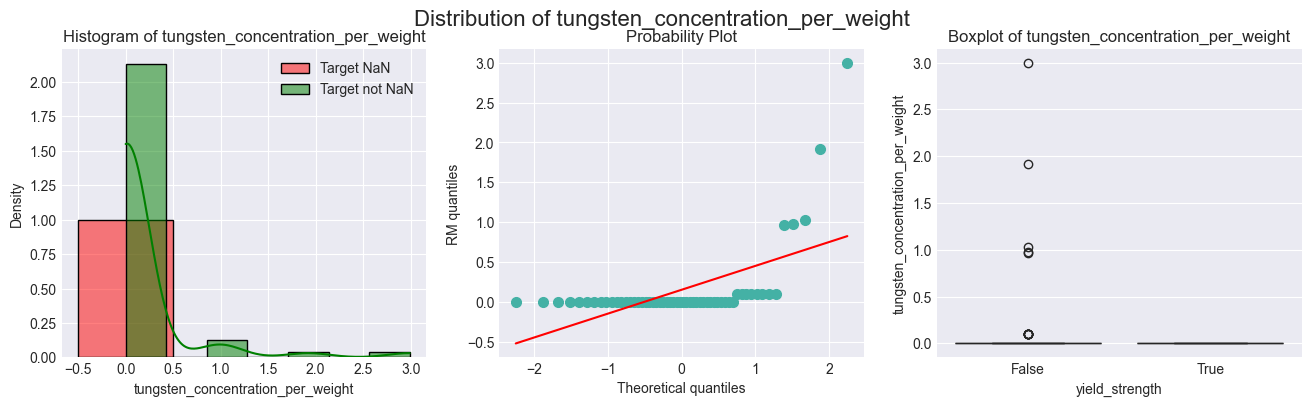

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




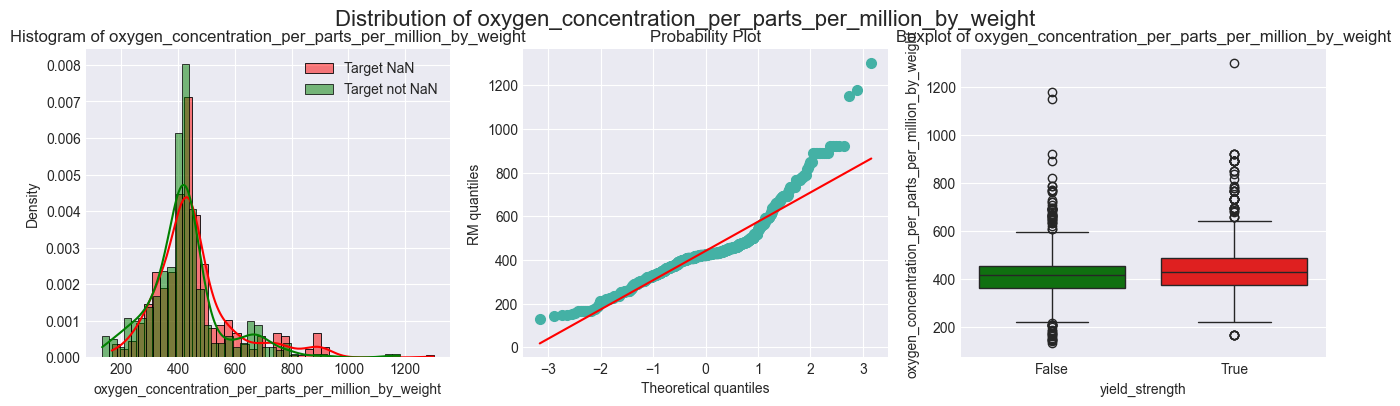

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




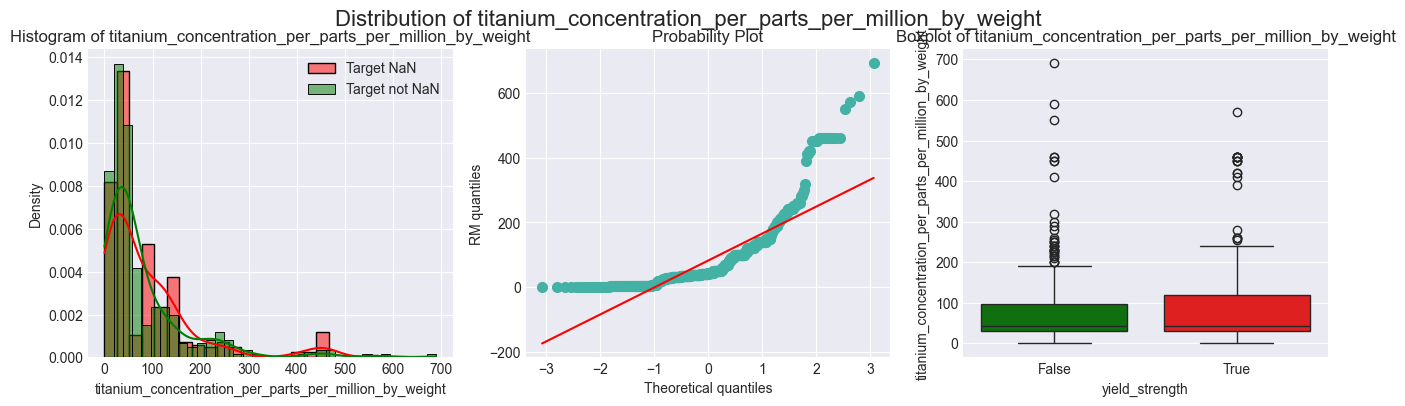

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




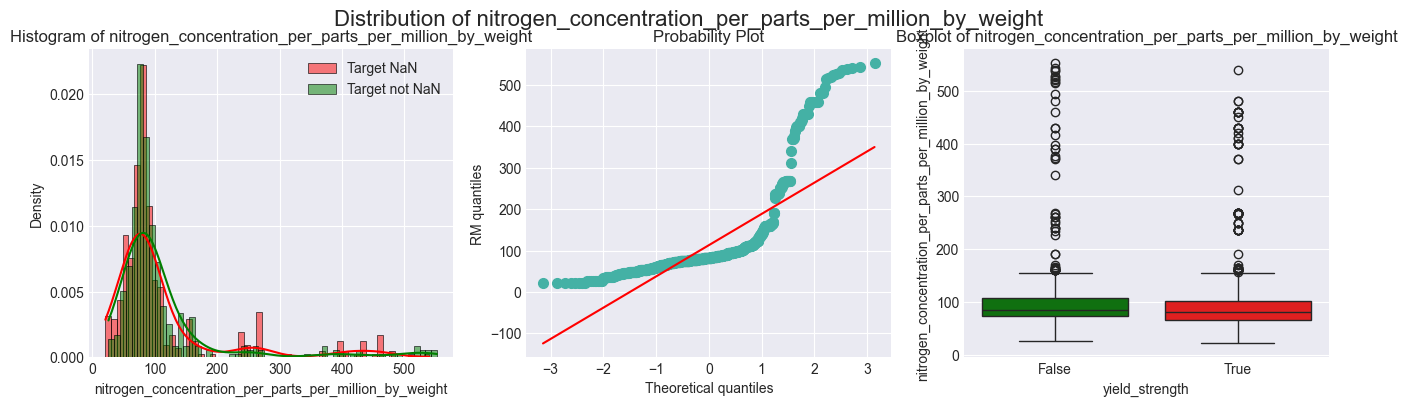

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




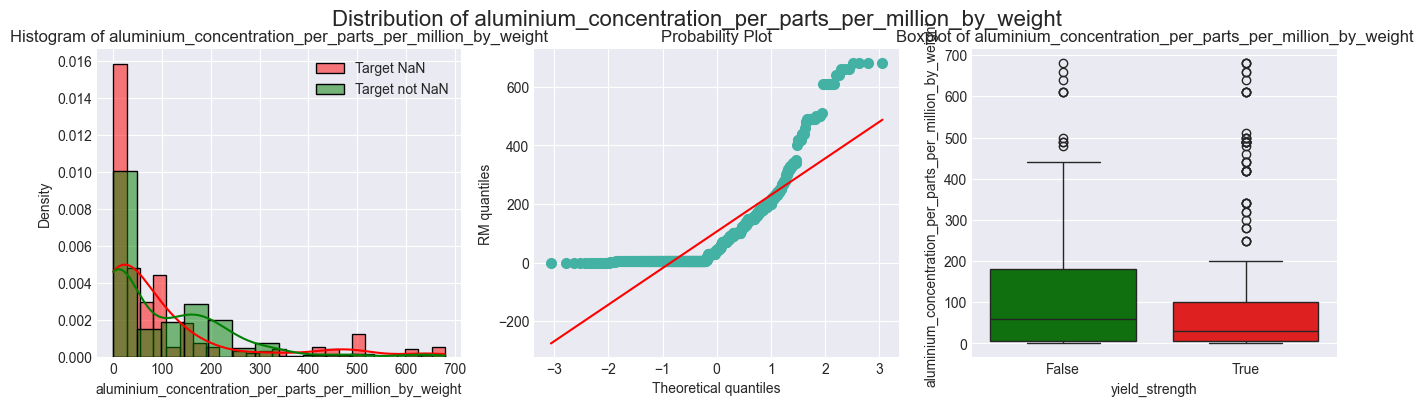

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




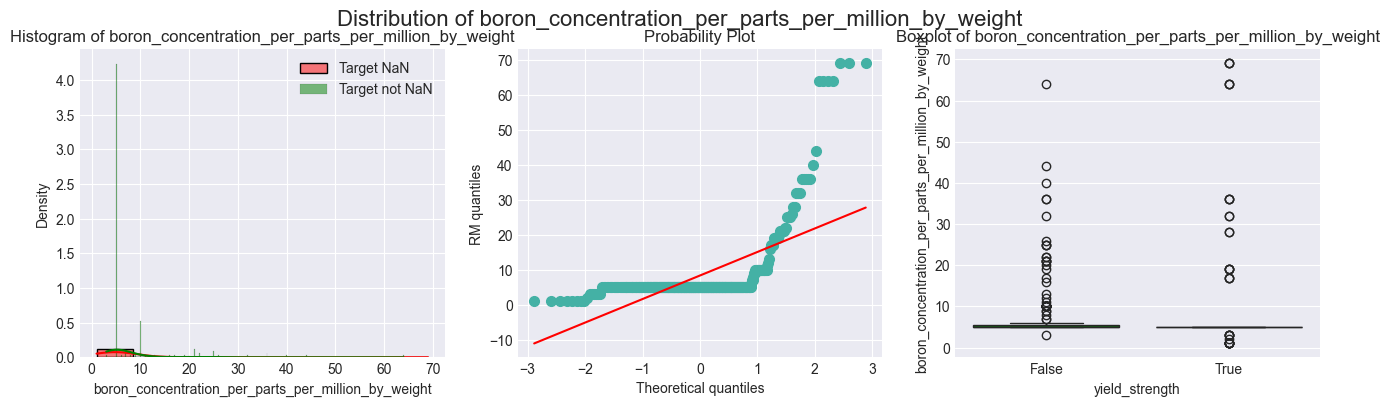

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




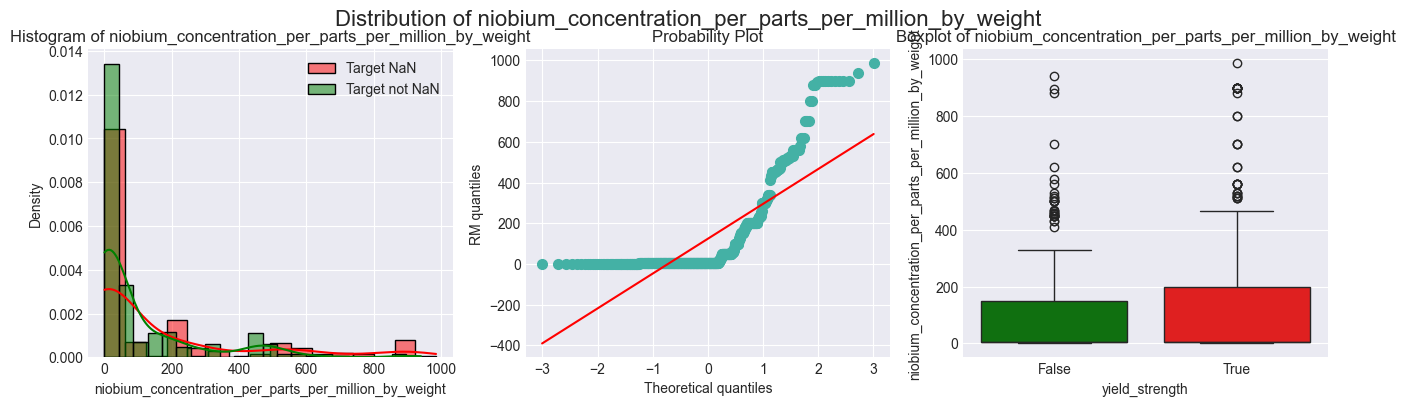

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




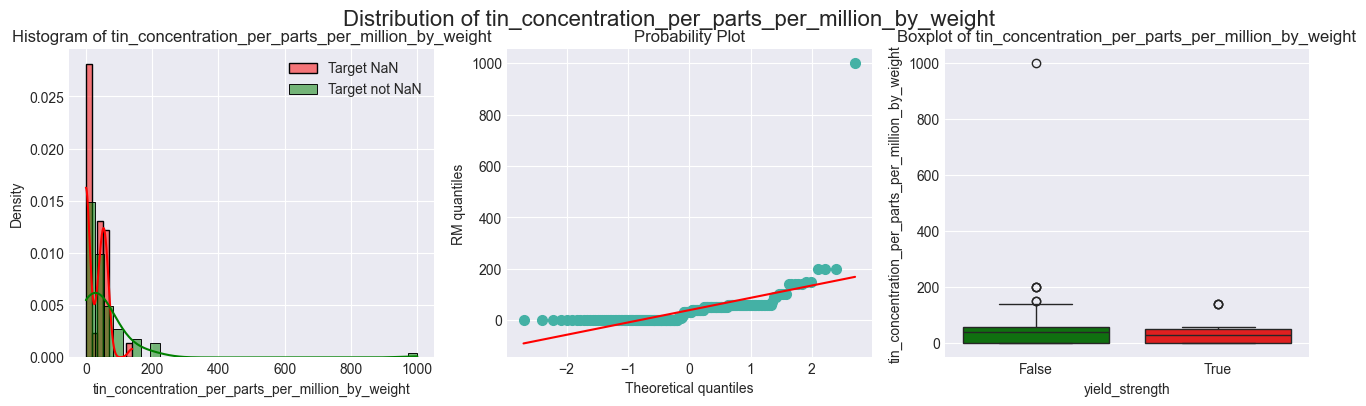

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




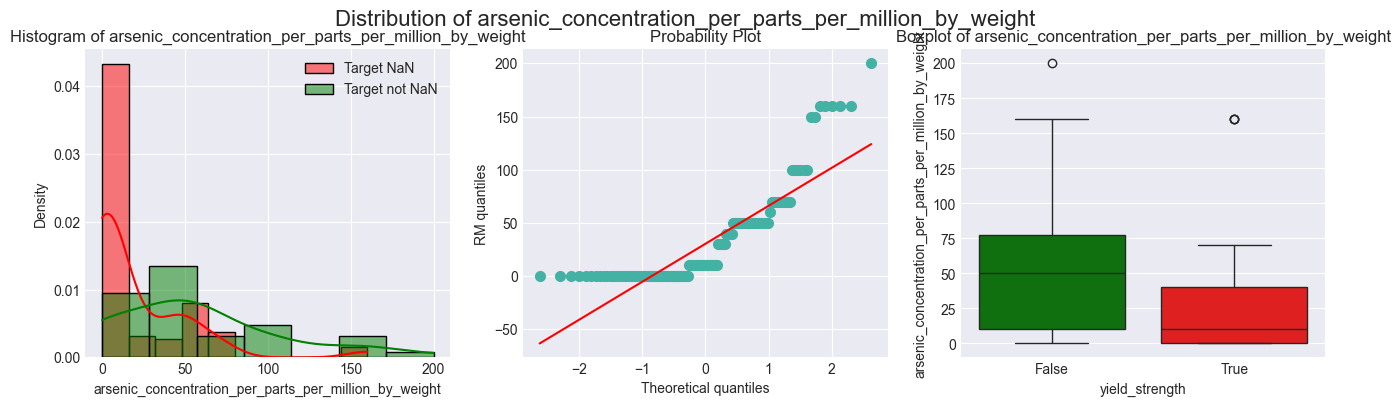

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




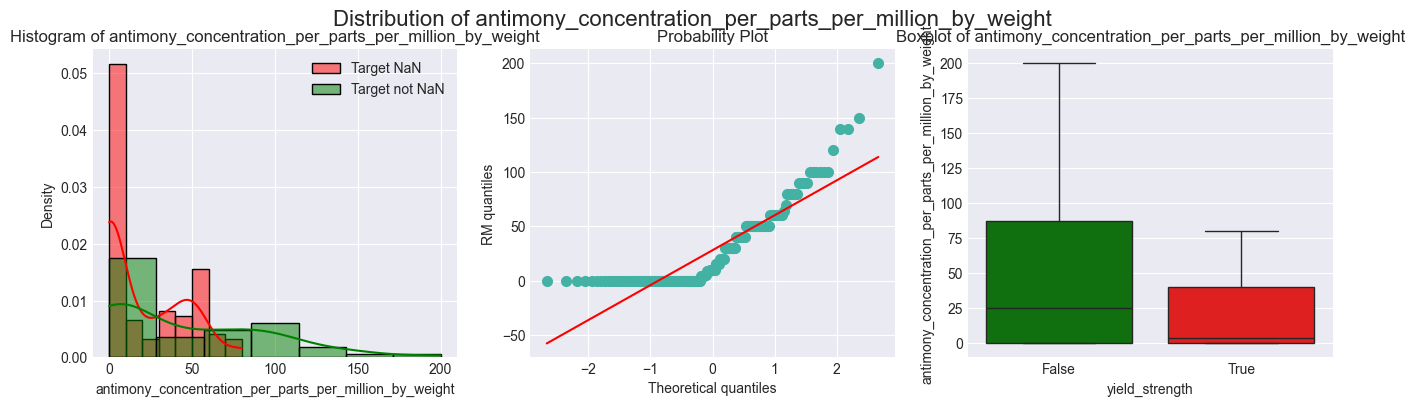

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




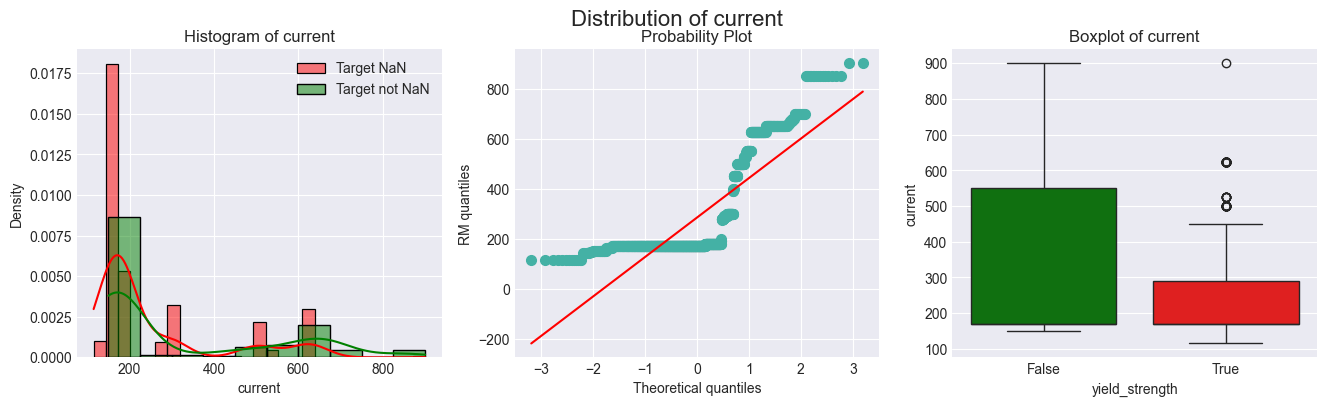

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




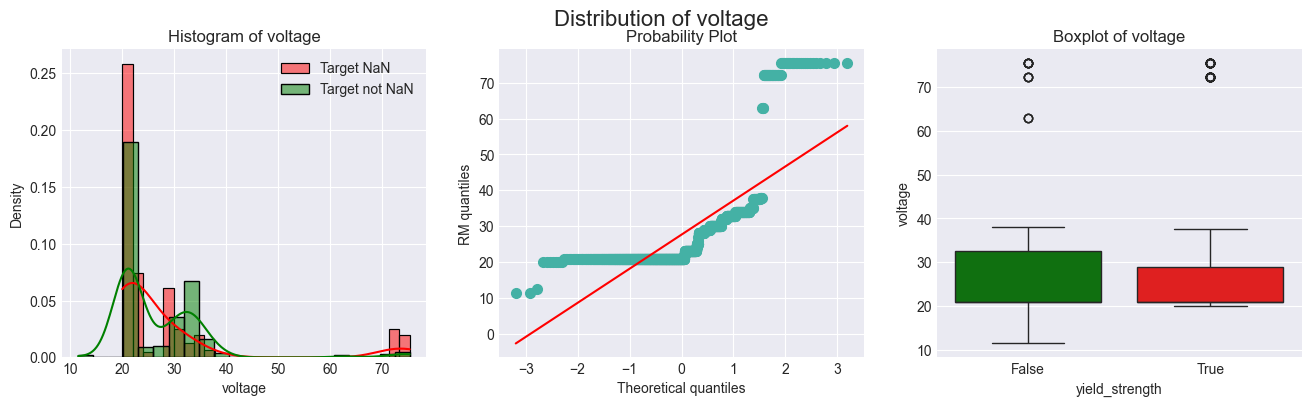

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




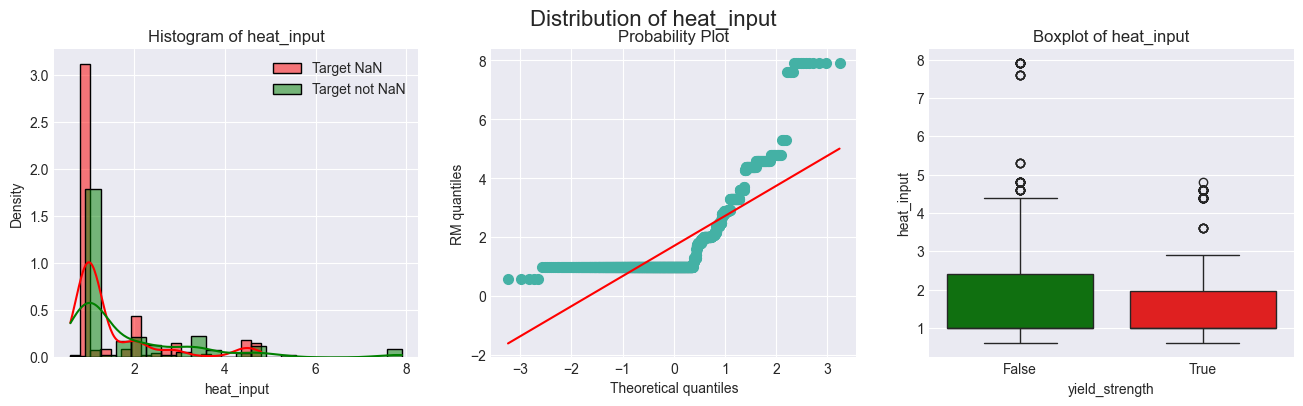

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




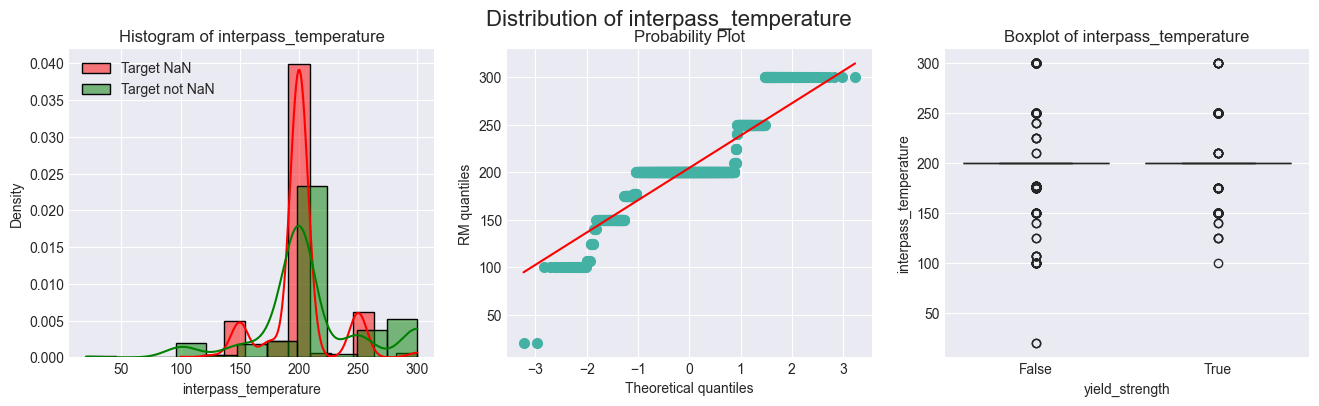

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




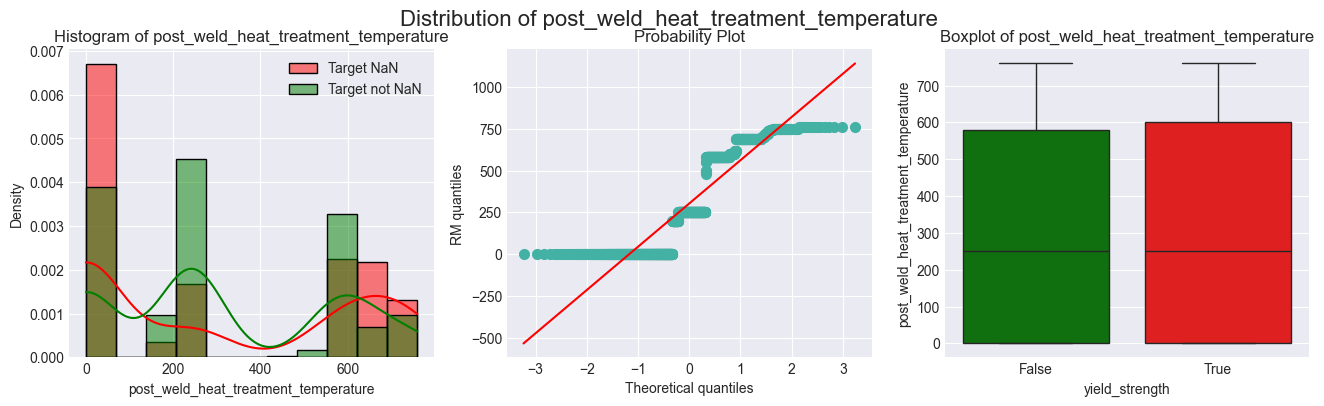

C:\Users\merte\AppData\Local\Temp\ipykernel_8388\1990153250.py:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




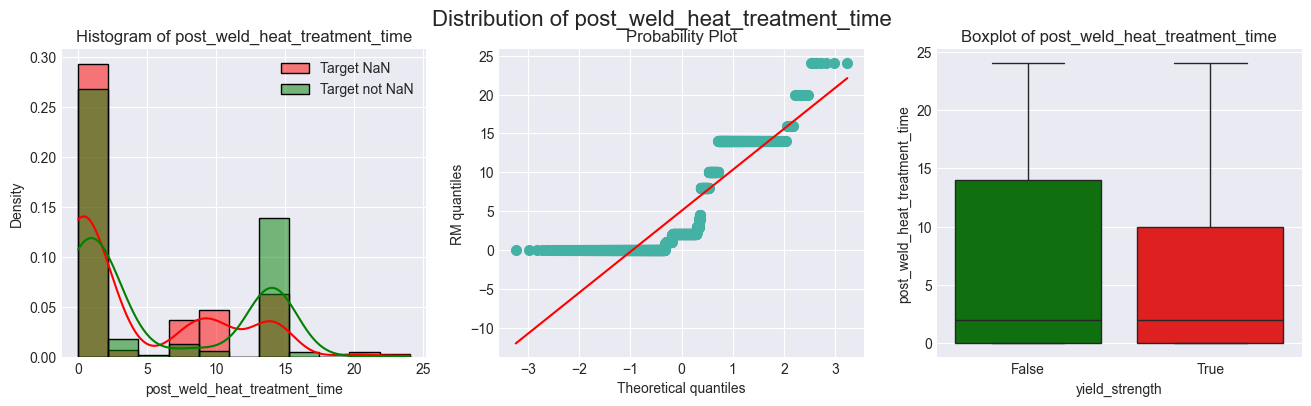

KeyboardInterrupt: 

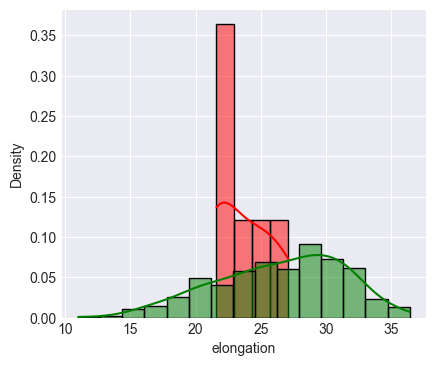

In [44]:
for feature in get_numerical_variables(X_train):
  if feature not in target_variable_names:
    diagnostic_plots(X_train,feature,target,'matplotlib')

We see a big differente in the distribution with the last features

# Test some semi-supervised models

## GANNs

In [62]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np


# Definindo o dispositivo para treinamento (GPU se disponível)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Definindo o Gerador
class Generator(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size, output_size),
        )
    
    def forward(self, x):
        return self.model(x)

# Definindo o Discriminador
class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size, hidden_size),
            nn.LeakyReLU(0.2),
            nn.Linear(hidden_size, 1),  # Saída para GAN (Real ou Falso)
        )
        
        # Camada adicional para regressão (previsão da target)
        self.regression_layer = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        features = self.model[:-1](x)
        gan_output = self.model[-1](features)
        regression_output = self.regression_layer(features)
        return gan_output, regression_output

# Função de treinamento da GANN
def train_gann(X, y, input_size, hidden_size, n_epochs=1000, batch_size=128):
    generator = Generator(input_size, hidden_size, input_size).to(device)
    discriminator = Discriminator(input_size, hidden_size).to(device)

    # Otimizadores
    optimizer_G = optim.Adam(generator.parameters(), lr=0.005)
    optimizer_D = optim.Adam(discriminator.parameters(), lr=0.005)

    # Critérios de perda
    criterion_GAN = nn.BCEWithLogitsLoss()  # Para GAN (real ou falso)
    criterion_regression = nn.MSELoss()  # Para regressão (previsão da target)

    
    X_train = torch.tensor(X.values, dtype=torch.float32).to(device)
    y_train = torch.tensor(y.values, dtype=torch.float32).view(-1, 1).to(device)
    mask_train = ~torch.isnan(y_train)
    y_train[torch.isnan(y_train)] = 0  # Substituir NaNs temporariamente por 0 (não afeta devido à máscara)

    for epoch in range(n_epochs):
        generator.train()
        discriminator.train()

        # Criar rótulos para GAN (reais=1, falsos=0)
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        # ---------------------
        # Treinando o Discriminador
        # ---------------------
        optimizer_D.zero_grad()

        # Pegando amostras reais
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        real_data = X_train[idx]
        real_targets = y_train[idx]
        real_mask = mask_train[idx]  # Máscara para essa batch

        # Gerando dados falsos
        z = torch.randn(batch_size, input_size).to(device)  # Vetores aleatórios
        fake_data = generator(z)

        # Prevendo com o discriminador
        real_gan_pred, real_regression_pred = discriminator(real_data)
        fake_gan_pred, _ = discriminator(fake_data)

        # Loss do discriminador
        real_loss_gan = criterion_GAN(real_gan_pred, real_labels)
        fake_loss_gan = criterion_GAN(fake_gan_pred, fake_labels)
        
        # Perda de regressão apenas nas amostras com target válido (não NaN)
        regression_loss = criterion_regression(real_regression_pred[real_mask], real_targets[real_mask])

        # Total loss do discriminador
        d_loss = (real_loss_gan + fake_loss_gan) / 2 + regression_loss
        d_loss.backward()
        optimizer_D.step()

        # -----------------
        # Treinando o Gerador
        # -----------------
        optimizer_G.zero_grad()

        # Gerar dados falsos e prever com o discriminador
        z = torch.randn(batch_size, input_size).to(device)
        generated_data = generator(z)
        gan_pred, _ = discriminator(generated_data)

        # Loss do gerador (queremos que o discriminador ache que os dados gerados são reais)
        g_loss = criterion_GAN(gan_pred, real_labels)
        g_loss.backward()
        optimizer_G.step()

        if epoch % 10 == 0:
            print(f"Epoch {epoch}/{n_epochs} | D Loss: {d_loss.item():.4f} | G Loss: {g_loss.item():.4f}")
    
    # Retornar os modelos treinados e os dados escalados
    return generator, discriminator



In [42]:
target_features=["yield_strength",
"ultimate_tensile_strength",]
target = target_features[0]

In [55]:
def load_dataset(dataset):
    X_train = pd.read_csv(f'processed_data/{dataset}/processed_train_{dataset}.csv')

    y_train = pd.read_csv("data/train.csv")[target]

    X_valid = pd.read_csv(f'processed_data/{dataset}/processed_validation_{dataset}.csv')

    y_valid = pd.read_csv("data/validation.csv")[target]

    X_train = X_train.append(X_valid)
    X_train = X_train.reset_index(drop=True)

    y_train = y_train.append(y_valid)
    y_train = y_train.reset_index(drop=True)

    X_test = pd.read_csv(f'processed_data/{dataset}/processed_test_{dataset}.csv')

    y_test = pd.read_csv("data/test.csv")[target]



    return X_train, y_train, X_test, y_test

In [63]:
X_train, y_train, X_test, y_test = load_dataset("custom")

C:\Users\merte\AppData\Local\Temp\ipykernel_15876\851372445.py:10: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\merte\AppData\Local\Temp\ipykernel_15876\851372445.py:13: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [64]:
generator, discriminator = train_gann(X_train, y_train, X_train.shape[1], 500, n_epochs=1000)

Epoch 0/1000 | D Loss: 281617.9688 | G Loss: 0.6724
Epoch 10/1000 | D Loss: 147769.9688 | G Loss: 0.0000
Epoch 20/1000 | D Loss: 79857.2188 | G Loss: 0.0001
Epoch 30/1000 | D Loss: 46884.8594 | G Loss: 0.0003
Epoch 40/1000 | D Loss: 20593.2090 | G Loss: 83.2742
Epoch 50/1000 | D Loss: 19132.5391 | G Loss: 0.1031
Epoch 60/1000 | D Loss: 13328.3916 | G Loss: 11.5223
Epoch 70/1000 | D Loss: 11055.5146 | G Loss: 5.0233
Epoch 80/1000 | D Loss: 7096.8833 | G Loss: 41.4751
Epoch 90/1000 | D Loss: 7047.1152 | G Loss: 0.0000
Epoch 100/1000 | D Loss: 5489.6104 | G Loss: 2.6543
Epoch 110/1000 | D Loss: 5255.6797 | G Loss: 0.0061
Epoch 120/1000 | D Loss: 3211.2488 | G Loss: 0.6776
Epoch 130/1000 | D Loss: 4191.0845 | G Loss: 1.5724
Epoch 140/1000 | D Loss: 3166.0029 | G Loss: 1.0497
Epoch 150/1000 | D Loss: 2714.6655 | G Loss: 1.9003
Epoch 160/1000 | D Loss: 3565.3958 | G Loss: 3.2646
Epoch 170/1000 | D Loss: 4477.6040 | G Loss: 2.1681
Epoch 180/1000 | D Loss: 2480.9995 | G Loss: 0.1557
Epoch 190/

In [65]:
def test_gann(discriminator, X, y):
    discriminator.eval()  # Colocar o modelo em modo de avaliação
    X_test = torch.tensor(X.values, dtype=torch.float32).to(device)
    y_test = torch.tensor(y.values, dtype=torch.float32).view(-1, 1).to(device)
    with torch.no_grad():  # Desativar o cálculo de gradiente durante o teste
        _, y_pred = discriminator(X_test)
        y_pred = y_pred.cpu().numpy()  # Converter de tensor para numpy para calcular métricas
        y_test = y_test.cpu().numpy()  # Converter o target real para numpy

    # Filtrando os NaNs do conjunto de teste
    mask_test = ~np.isnan(y_test)
    y_pred = y_pred[mask_test]
    y_test = y_test[mask_test]

    # Calcular o erro médio quadrático (Mean Squared Error - MSE)
    mse = np.mean((y_pred - y_test)**2)
    print(f"MSE no conjunto de teste: {mse:.4f}")
    return y_pred, y_test

In [66]:
y_pred, y_tested = test_gann(discriminator, X_test, y_test)

MSE no conjunto de teste: 1690.1067


In [67]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from typing import List

def plot_results(y_true: List[float], y_pred: List[float]) -> None:
    """
    Plot both the standardized residuals plot and the predicted vs true values plot side by side,
    with a common title that includes the R2 score.

    Args:
        y_true: List of true values.
        y_pred: List of predicted values.

    Returns:
        None

    Raises:
        ValueError: If y_true and y_pred have different lengths.
    """

    # Check if lengths are the same
    if len(y_true) != len(y_pred):
        raise ValueError("Lengths of y_true and y_pred must be the same.")

    # Calculate the residuals
    residuals = np.array(y_true) - np.array(y_pred)

    # Standardize the residuals
    std_residuals = residuals / np.std(residuals)

    # Calculate the R2 score
    r2 = r2_score(y_true, y_pred)

    # Create the subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))

    # Common title with R2 score
    fig.suptitle(fr"Evaluation of TGV Model to Average train delay time - = {r2:.2f}", fontsize=18)

    # Plot for standardized residuals
    axes[0].scatter(y_pred, std_residuals, c='blue')
    axes[0].axhline(y=0, color='r', linestyle='--')
    axes[0].set_xlabel("Predicted Values", fontsize=14)
    axes[0].set_ylabel("Standardized Residuals", fontsize=14)
    axes[0].set_title("Standardized Residuals Plot", fontsize=16)

    # Plot for y_true vs y_pred
    axes[1].scatter(y_pred, y_true, c='blue', label='Data')
    min_val = min(min(y_true), min(y_pred))
    max_val = max(max(y_true), max(y_pred))
    axes[1].plot([min_val, max_val], [min_val, max_val], 'r--', label='x=y')
    axes[1].set_xlabel("Predicted Values", fontsize=14)
    axes[1].set_ylabel("True Values", fontsize=14)
    axes[1].set_title("Predicted vs True Values", fontsize=16)
    axes[1].legend(fontsize=12)

    # Show the plots
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


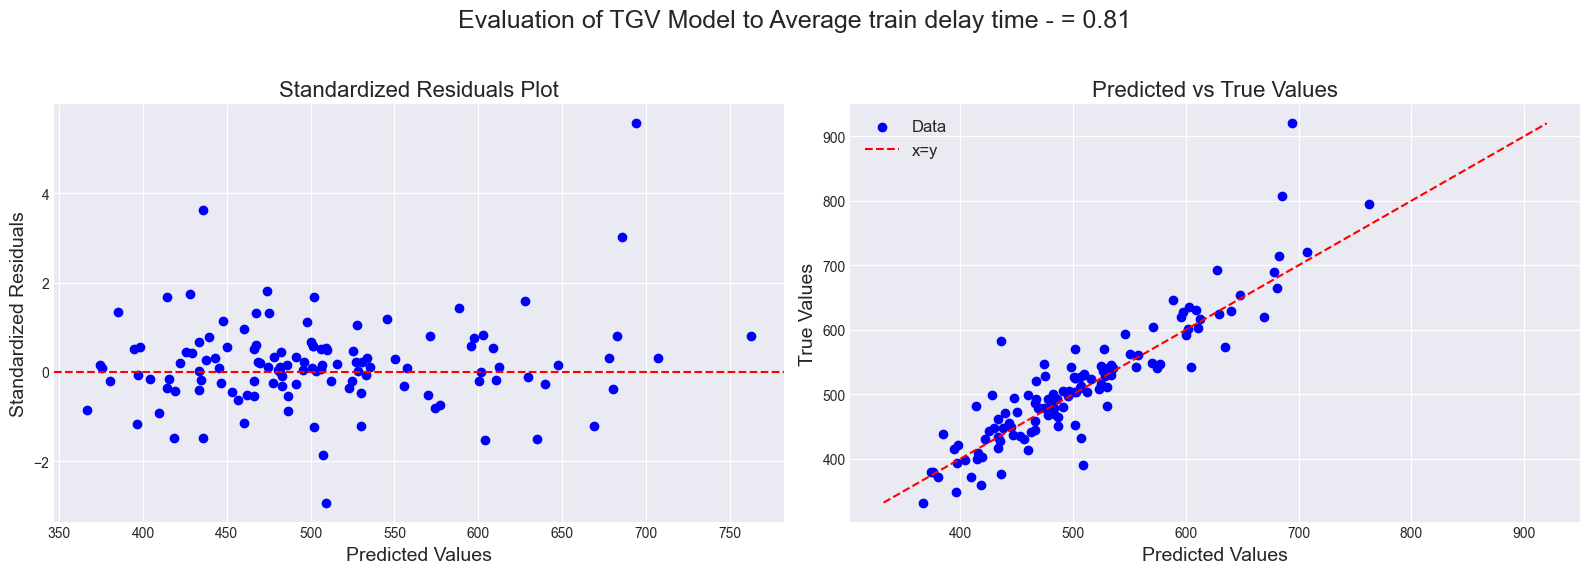

In [68]:
plot_results(y_tested, y_pred)

## Label Propagation

In [77]:
from sklearn.ensemble import ExtraTreesRegressor

def fill_missing_with_extra_trees(X_train, y_train):
    # Identificar onde y_train tem valores não nulos e onde tem NaN
    not_nan_mask = ~np.isnan(y_train)
    nan_mask = np.isnan(y_train)
    
    # Treinar Extra Trees Regressor apenas com os dados completos (sem NaN)
    model = ExtraTreesRegressor(n_estimators=100, random_state=42)
    model.fit(X_train[not_nan_mask], y_train[not_nan_mask])
    
    # Preencher os valores de NaN com previsões do modelo
    y_train_filled = y_train.copy()
    y_train_filled[nan_mask] = model.predict(X_train[nan_mask])
    
    return y_train_filled

In [85]:
def prepare_data(X_train, y_train, X_test, y_test):
    # Converte y_train e y_test para numpy arrays se forem DataFrames ou Series
    y_train = y_train.values if isinstance(y_train, (pd.DataFrame, pd.Series)) else y_train
    y_test = y_test.values if isinstance(y_test, (pd.DataFrame, pd.Series)) else y_test
    X_train = X_train.values if isinstance(X_train, (pd.DataFrame, pd.Series)) else X_train
    X_test = X_test.values if isinstance(X_test, (pd.DataFrame, pd.Series)) else X_test

    # Identificar quais valores de y_test são NaN
    nan_mask = np.isnan(y_test)

    # Adicionar apenas os valores de y_test que são NaN ao y_train, marcando-os como -1
    y_train_with_nan = np.concatenate([y_train, y_test[nan_mask]])
    X_train_with_nan = np.concatenate([X_train, X_test[nan_mask]])

    X_test_clean = X_test[~nan_mask]
    y_test_clean = y_test[~nan_mask]


    # Marcar os valores de NaN que foram adicionados no y_train como -1 (não rotulados)
    # y_train_with_nan[np.isnan(y_train_with_nan)] = -1

    # Retornar os dados ajustados
    return X_train_with_nan, y_train_with_nan, X_test_clean, y_test_clean

In [86]:
from sklearn.metrics import mean_squared_error

def train_and_evaluate_extra_trees(X_train, y_train, X_test, y_test):
    # Treinar o modelo Extra Trees Regressor
    extra_trees_model = ExtraTreesRegressor(n_estimators=100, random_state=42)
    extra_trees_model.fit(X_train, y_train)

    # Prever no conjunto de testes
    y_pred = extra_trees_model.predict(X_test)

    # Avaliar o desempenho usando Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print(f'Extra Trees Regressor MSE: {mse:.4f}')
    
    return y_pred

In [87]:
X_train_with_nan, y_train_with_nan, X_test_clean, y_test_clean = prepare_data(X_train, y_train, X_test, y_test)

y_train_filled = fill_missing_with_extra_trees(X_train_with_nan, y_train_with_nan)

# Agora continue com o seu pipeline, usando o y_train_filled
y_pred = train_and_evaluate_extra_trees(X_train_with_nan, y_train_filled, X_test_clean, y_test_clean)


Extra Trees Regressor MSE: 1483.4041


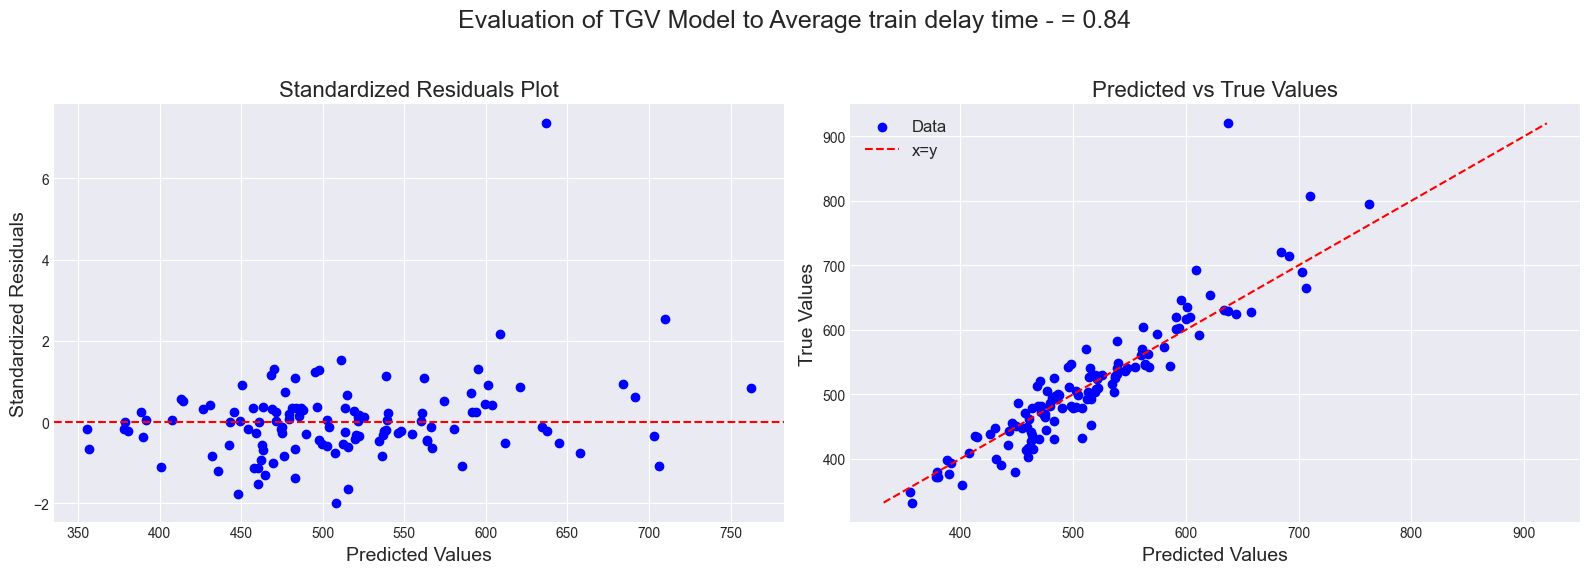

In [88]:
plot_results(y_test_clean, y_pred)